<a href="https://colab.research.google.com/github/Mustafasohail7/Capstone/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Parameters

In [1]:
start_date = '2024-05-09'
end_date = ''
coords_file = 'testing_coords.txt'
method = 'NDWI'
threshold = 0.05

### Setting Up Dependencies

In [4]:
!pip install landsatxplore numpy scipy matplotlib rasterio --quiet 2> /dev/null

In [5]:
!wget -P src/api/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/API/main.py"
!wget -P src/api/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/API/landsat.py"
!wget -P src/api/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/API/utils.py"
!wget -nc "https://github.com/Mustafasohail7/Capstone/raw/main/API/co-ords.txt"
!wget -nc "https://github.com/Mustafasohail7/Capstone/raw/main/API/testing_coords.txt"
!wget -P src/algos/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/vanilla/main.py"
!wget -P src/algos/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/vanilla/main_helper.py"
!wget -P src/algos/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/vanilla/find_files.py"

File ‘src/api/main.py’ already there; not retrieving.

File ‘src/api/landsat.py’ already there; not retrieving.

File ‘src/api/utils.py’ already there; not retrieving.

File ‘co-ords.txt’ already there; not retrieving.

File ‘testing_coords.txt’ already there; not retrieving.

File ‘src/algos/main.py’ already there; not retrieving.

File ‘src/algos/main_helper.py’ already there; not retrieving.

File ‘src/algos/find_files.py’ already there; not retrieving.



### Downloading Scene Files

In [6]:
!python /content/src/api/main.py {coords_file} {start_date} {end_date}

coordinate: 1 out of 1
First Scene Acquired for 2024-05-06
--------------------------
Second Scene Acquired for 2024-04-20
--------------------------
Download options found
--------------------------
Products available to download:  8
--------------------------
retrying...
First Scene Acquired for 2024-05-06
--------------------------
Second Scene Acquired for 2024-04-20
--------------------------
Download options found
--------------------------
Products available to download:  8
--------------------------
All downloads available
--------------------------
testing
requesting session
https://dds.cr.usgs.gov/download/eyJpZCI6NjIwNzU4MTAxLCJjb250YWN0SWQiOjI2ODg3OTMzfQ==
got response
downloading from here
File downloaded successfully.
--------------------------
testing
requesting session
https://dds.cr.usgs.gov/download/eyJpZCI6NjIwNzU4MTAyLCJjb250YWN0SWQiOjI2ODg3OTMzfQ==
got response
downloading from here
File downloaded successfully.
--------------------------
testing
requesting session

### Processing Images

Found two subdirectories in the downloads folder.


/content/src/algos/main_helper.py:19: RuntimeWarning: invalid value encountered in divide
  ndwi = (green - nir) / (green + nir)


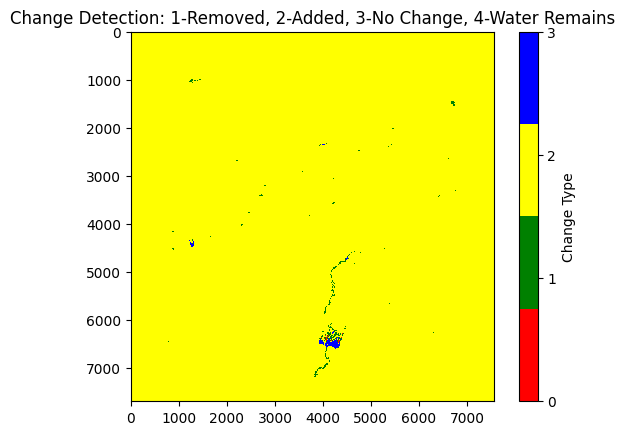

Net water change: 70134.3 m^2


In [13]:
import sys
sys.path.append('/content/src/algos')

from main import main
from find_files import find

if method=='NDWI':
  index=0
elif method=='AEWI':
  index==1

file_paths = find()

main(file_paths[0], file_paths[1], index, threshold, False)
